In [2]:
import matplotlib.pyplot as plt

## EULER

In [3]:
def euler_edo2(Fx, a, b, y0, y1, N, Px, Qx, n):
    '''funcion que resuleve la EDO2 de la forma y'' + p(x)y' + q(x)y = f(x)
    
    INPUTS:
    - Fx: funcion f(x)
    - a, b: extremos del intervalo 
    - y0, y1: condiciones iniciales para y(a) y y'(a)
    - N: numero de subintervalos
    - Px, Qx: funciones p(x) y q(x)
    - n: parametro de la funcion q(x)
    '''

    h = (b-a)/N  # paso

    x = [a]
    u = [y0]  # u(x) = y(x)
    v = [y1]  # v(x) = y'(x)

    for k in range(N):
        x.append(x[k] + h)
        u.append(u[k] + h*v[k])
        v.append(v[k] + h*( - Px(x[k])*v[k] - Qx(x[k], n)*u[k] + Fx(x[k]))  )
    
    return x, u, v

In [4]:
# EDO2: y'' + P(x)y' + Q(x,n)y = f(x)

def f(x):
    return 1

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return 1

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return 1


#condiciones iniciales
a = 0
b = 5
y0 = 0
y1 = 1
N = 50  # la mitad de intervalos

n = 0
valores_x_eul, sol_y_eul, sol_y_eul = euler_edo2(f, a, b, y0, y1, N, P, Q, n)

VALOR ÚLTIMO PUNTO (Sol. Numérica Euler):
x = 4.999999999999998
y(x) = -0.06959898907757615


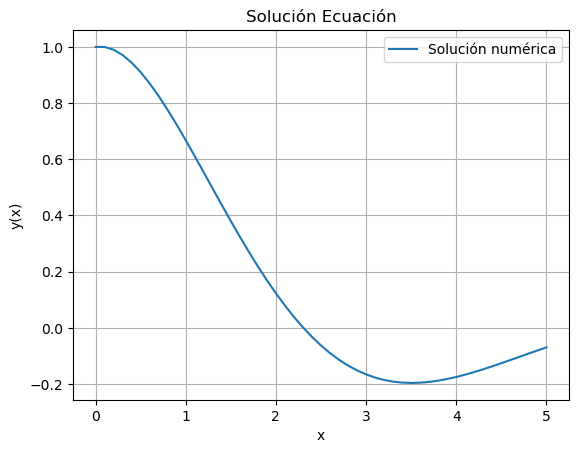

In [5]:
# VALORES resultados
print('VALOR ÚLTIMO PUNTO (Sol. Numérica Euler):')
print(f'x = {valores_x_eul[-1]}')
print(f'y(x) = {sol_y_eul[-1]}')


# GRAFICAR RESULTADOS
plt.plot(valores_x_eul, sol_y_eul, label='Solución numérica')
#plt.plot(valores_x, sol_y_1, label='Derivada de la solución')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solución Ecuación')
plt.legend()
plt.grid(True)
plt.show()

## RUNGE-KUTTA ord. 4

In [6]:
def runge_kutta_edo2(Fx, a, b, y0, y1, N, Px, Qx, n):
    '''Función que resuelve la EDO2 de la forma y'' + p(x)y' + q(x)y = f(x) utilizando el método de Runge-Kutta de orden 4.
    
    INPUTS:
    - Fx: función f(x)
    - a, b: extremos del intervalo 
    - y0, y1: condiciones iniciales para y(a) y y'(a)
    - N: número de subintervalos
    - Px, Qx: funciones p(x) y q(x)
    - n: parámetro de la función q(x)
    '''

    h = (b-a)/N  # paso

    x = [a]
    u = [y0]  # u(x) = y(x)
    v = [y1]  # v(x) = y'(x)

    for k in range(N):
        x_k = x[k]
        u_k = u[k]
        v_k = v[k]

        # Runge-Kutta de orden 4
        k1_u = h * v_k
        k1_v = h * (-Px(x_k) * v_k - Qx(x_k, n) * u_k + Fx(x_k))

        k2_u = h * (v_k + 0.5 * k1_v)
        k2_v = h * (-Px(x_k + 0.5 * h) * (v_k + 0.5 * k1_v) - Qx(x_k + 0.5 * h, n) * (u_k + 0.5 * k1_u) + Fx(x_k + 0.5 * h))

        k3_u = h * (v_k + 0.5 * k2_v)
        k3_v = h * (-Px(x_k + 0.5 * h) * (v_k + 0.5 * k2_v) - Qx(x_k + 0.5 * h, n) * (u_k + 0.5 * k2_u) + Fx(x_k + 0.5 * h))

        k4_u = h * (v_k + k3_v)
        k4_v = h * (-Px(x_k + h) * (v_k + k3_v) - Qx(x_k + h, n) * (u_k + k3_u) + Fx(x_k + h))

        # Actualizar valores utilizando la fórmula de Runge-Kutta
        x.append(x_k + h)
        u.append(u_k + (k1_u + 2 * k2_u + 2 * k3_u + k4_u) / 6)
        v.append(v_k + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6)

    return x, u, v

In [7]:
# EDO2: y'' + P(x)y' + Q(x,n)y = f(x)

def f(x):
    return 1

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return 1

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return 1


#condiciones iniciales
a = 0
b = 5
y0 = 0
y1 = 1
N = 50  # la mitad de intervalos

valores_x_rg, sol_y_rg, sol_y1_rg = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n=0)

VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):
x = 4.999999999999998
y(x) = 0.9866477759472104


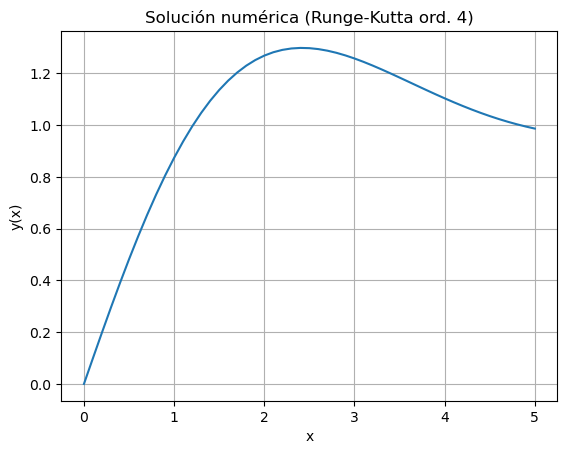

In [8]:
# VALORES resultados
print('VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):')
print(f'x = {valores_x_rg[-1]}')
print(f'y(x) = {sol_y_rg[-1]}')


# GRAFICAR RESULTADOS
plt.plot(valores_x_rg, sol_y_rg)
#plt.plot(valores_x_rk, sol_y_1_rk, label='Derivada de la solución (Runge-Kutta)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solución numérica (Runge-Kutta ord. 4)')
plt.grid(True)
plt.show()